In [1]:
# author: Tom Stone <tomstone@stanford.edu>
# author: Proloy Das <email:proloyd94@gmail.com>
# License: BSD (3-clause)
%matplotlib widget
import numpy as np

from matplotlib import pyplot
from utils import *    # We just talked about this line. ;)


pyplot.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica",
    "figure.constrained_layout.use": True,
    "savefig.dpi": 300
})

The very first line should be familiar. Isn't it? All the permutation tests, bootstraping relies on this line to produce reproducible results.

In [2]:
rng = np.random.default_rng(12345)

We begin with generating 1024 samples of the following AR(2) process:
$$\begin{aligned}
x_k = 0.75 x_{k-1} - 0.5 x_{k-2} + w_k; \ \ w_k \sim \mathcal{N}(0, 1)
\end{aligned}$$
We will start with $x_0=0$, and $x_1=0$, generate 1024 + 10 samples, and discard first 10 samples.
Also we will create the time indices corresponding the white noise sequence.

In [3]:
n = 1024
# Generate the samples of driving noise.
w = rng.normal(size=n+10)
# Generate the AR process samples starting from k = 2.
x = np.zeros(n+10)
for k in range(2, n+10):
    x[k] = 0.75 * x[k-1] - 0.5 * x[k-2] + w[k]
ar2 = x[10:]
# Also keep track of the time indices associated with the samples.
time_indices = np.arange(1024)


Plot the white noise againt time using matplotlib.

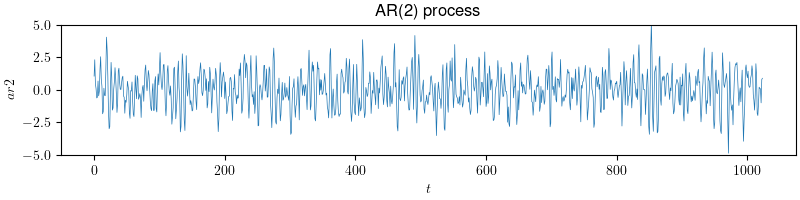

In [4]:
fig1, ax = pyplot.subplots(figsize=(8, 2))
ax.plot(time_indices, ar2, linewidth=0.5)
ax.set_xlabel('$t$')
ax.set_ylabel('$ar2$')
ax.set_ylim([-5, 5])
_ = ax.set_title('AR(2) process')

Now we compute the autocovaraince sequence from the realization that we generated.

In [5]:
# Sampe autocorrelation
max_lag = ar2.shape[-1] - 1
sample_acov, lags = compute_autocovaraince(ar2, max_lag)

We take care of the true autocovariance. This problem of finidng theoritical autocovariance for the AR processes is not easy. The following lines of code generates the true autocovariance sequence from the AR(2) process definition.

In [6]:
phi = np.array([1, -0.75, 0.5])   # note that the sign reversal of second and third coeffiences, that's not by mistake.
p = max_lag

true_acov, lags = compute_theoritical_ar_acov(phi, p)

Lets take a quick look at the autocovarainces to gauze the estimation error, i.e., the noise.

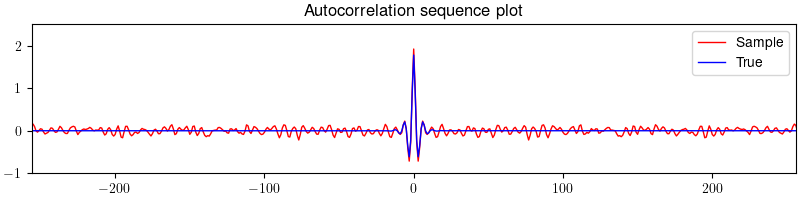

In [7]:
fig1, ax = pyplot.subplots(figsize=(8, 2))
ax.plot(lags, sample_acov, linewidth=1, color='r', label='Sample')
ax.plot(lags, true_acov, linewidth=1, color='b', label='True')
ax.set_ylim([-1.0, 2.5])
ax.legend()
ax.set_xlim([-256, 256])
_ = ax.set_title('Autocorrelation sequence plot')

Now we are ready for periodograms!

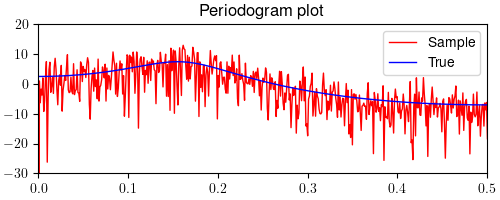

In [8]:
S_xx_true = np.abs(fft.fft(true_acov))
freqs_ = np.linspace(0, 1, num=len(lags))

S_xx_est, freqs = compute_periodogram(ar2)


# Periodogram plot
fig1, ax = pyplot.subplots(figsize=(5, 2))
ax.plot(freqs, 10*np.log10(S_xx_est), linewidth=1, color='r', label='Sample')
ax.plot(freqs_, 10*np.log10(S_xx_true), linewidth=1, color='b', label='True')
ax.set_ylim([-30, 20])
ax.set_xlim([0., 0.5])
ax.legend()
_ = ax.set_title('Periodogram plot')

###  Next steps

Now lets jump to the `ar4_process.ipynb` notebook, and run the same analysis. This should be easy! We will come back here later.

# Bias Reduction

Now, we will import the `compute_tapered_periodogram()` function that you implemented.

NOTE: at this current momenet this notebook cannot see the `compute_tapered_periodogram()` function in the `utils.py` script, since the function was added after you imported the functions from the script. Once imported, python kernel, memorizes the version of the script and does not keep track of newly added function. So, we will need to restart the kernel, and rerun the notebook from the begining.

Don't worry, the random process realization will be exactly the same, thanks to _____. [Fill in the gap]

Anyways, let get to the computation now. And we will compare them to th true spectrum.

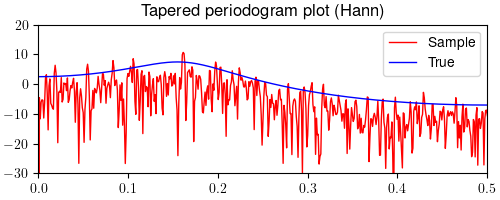

In [9]:
St_xx_est, freqs = compute_tapered_periodogram(ar2, 'hann')

fig1, ax = pyplot.subplots(figsize=(5, 2))
ax.plot(freqs, 10*np.log10(St_xx_est), linewidth=1, color='r', label='Sample')
ax.plot(freqs_, 10*np.log10(S_xx_true), linewidth=1, color='b', label='True')
ax.set_ylim([-30, 20])
ax.set_xlim([0., 0.5])
ax.legend()
_ = ax.set_title('Tapered periodogram plot (Hann)')

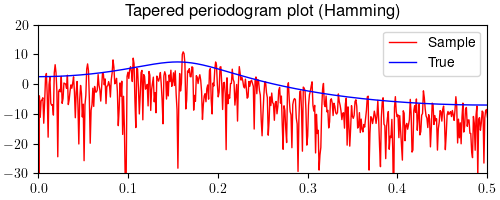

In [10]:
St_xx_est, freqs = compute_tapered_periodogram(ar2, 'hamming')

fig1, ax = pyplot.subplots(figsize=(5, 2))
ax.plot(freqs, 10*np.log10(St_xx_est), linewidth=1, color='r', label='Sample')
ax.plot(freqs_, 10*np.log10(S_xx_true), linewidth=1, color='b', label='True')
ax.set_ylim([-30, 20])
ax.set_xlim([0., 0.5])
ax.legend()
_ = ax.set_title('Tapered periodogram plot (Hamming)')

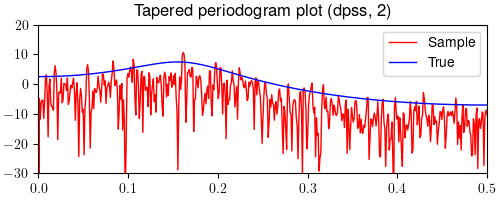

In [11]:
NW = 2
St_xx_est, freqs = compute_tapered_periodogram(ar2, ('dpss', NW))

S_xx_true = np.abs(fft.fft(true_acov))
freqs_ = np.linspace(0, 1, num=len(S_xx_true))

fig1, ax = pyplot.subplots(figsize=(5, 2))
ax.plot(freqs, 10*np.log10(St_xx_est), linewidth=1, color='r', label='Sample')
ax.plot(freqs_, 10*np.log10(S_xx_true), linewidth=1, color='b', label='True')
ax.set_ylim([-30, 20])
ax.set_xlim([0., 0.5])
ax.legend()
_ = ax.set_title(f'Tapered periodogram plot (dpss, {NW})')

Change the NW from 2 to 10 in steps of 2, and see what happens!

Works like a charm. Doesn't it?  

Now lets move to `ar4_process.ipynb`, and see it the tapering actually helps with bias. 

# Variance Reduction
We will import the `compute_multitaper_spectrogram()` function that you implemented.

NOTE: you will need to restart the kernel, and rerun the notebook from the begining for this notebook to see the `compute_multitaper_spectrogram()` function in the `utils.py` script.

Once imported, compute the multitaper spectrum and compare it to the true spectrum.

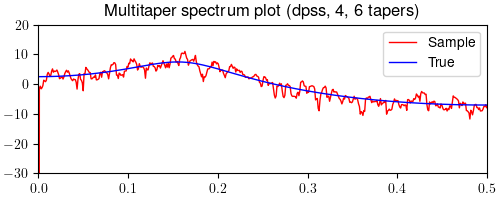

In [12]:
NW = 4
Kmax = 6
Smtm_xx_est, freqs = compute_multitaper_spectrum(ar2, NW=NW, Kmax=Kmax)

S_xx_true = np.abs(fft.fft(true_acov))
freqs_ = np.linspace(0, 1, num=len(S_xx_true))

fig1, ax = pyplot.subplots(figsize=(5, 2))
ax.plot(freqs, 10*np.log10(Smtm_xx_est), linewidth=1, color='r', label='Sample')
ax.plot(freqs_, 10*np.log10(S_xx_true), linewidth=1, color='b', label='True')
ax.set_ylim([-30, 20])
ax.set_xlim([0., 0.5])
ax.legend()
_ = ax.set_title(f'Multitaper spectrum plot (dpss, {NW}, {Kmax} tapers)')

Congrats you finished this notebook!


Now lets jump to the `ar4_process.ipynb` notebook, and run the same analysis. This should be easy! We will come back here later.